# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. | Introduction of Data 👋</div>

The [Personal Key Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) dataset contains 320K rows and 18 columns. It is a cleaned, smaller version of the 2020 annual CDC (Centers for Disease Control and Prevention) survey data of 400k adults. For each patient (row), it contains the health status of that individual. The data was collected in the form of surveys conducted over the phone. Each year, the CDC calls around 400K U.S residents and asks them about their health status, with the vast majority of questions being yes or no questions. Below is a description of the features collected for each patient: 


| # | Feature | Description
| --- | --- | --- 
| 1 | HeartDisease | Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
| 2 | BMI | Body Mass Index (BMI)
| 3 | Smoking | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
| 4 | AlcoholDrinking | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
| 5 | Stroke | (Ever told) (you had) a stroke?
| 6 | PhysicalHealth | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 
| 7 | MentalHealth | Thinking about your mental health, for how many days during the past 30 days was your mental health not good?
| 8 | DiffWalking | Do you have serious difficulty walking or climbing stairs?
| 9 | Sex | Are you male or female?
| 10 | AgeCategory | Fourteen-level age category
| 11 | Race | Imputed race/ethnicity value
| 12 | Diabetic | (Ever told) (you had) diabetes?
| 13 | PhysicalActivity | Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
| 14 | GenHealth | Would you say that in general your health is...
| 15 | SleepTime | On average, how many hours of sleep do you get in a 24-hour period?
| 16 | Asthma | (Ever told) (you had) asthma?
| 17 | KidneyDisease | Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
| 18 | SkinCancer | (Ever told) (you had) skin cancer?

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">2. | Read and Analasis the  Data 👋</div>

**Import the important library** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde, gaussian_kde
from matplotlib import gridspec
from sklearn.preprocessing import LabelEncoder , StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split

**Read data by pd.read_csv from pandas and save it in df**

In [2]:
# Import Dataset
# df = pd.read_csv('G:\\tensorflow\\Feature Engineering Projects\\heart_2020_cleaned.csv')
df = pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv')
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


**Show informations about the data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

**Describe the numerical  columns**

In [4]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


*  **BMI** - **min**.: 12; **max**.: 94.8 - with a BMI of 94.8, a person must be extremely morbidly obese (which is not that extremely improbable, given the prevalence of obesity in the US);
* (**PhysicalHealth**, **MentalHealth**) - there is a daily scale, from 0 to 30 days, **outliers** are hard to find here
*  **SleepTime** - we can see that the mean as well as the median are quite close to each other: the average sleep time of the respondents is between 7 and 8 hours, but we also have strange answers, such as 1 hour or 24 hours, which doesn't seem to be possible. When excluding these values, you can use the interquartile range, exclude 5% of extreme observations or use some statistical tests to determine whether a certain observation is an outlier.
* **BMI** more than 60-70 is highly implausible. You may create a cap here to prevent unnecessary influence.
*  **SleepTime ,PhysicalHealth and  MentalHealth** are considered as continuous only integers, so we can treat them as discontinuous.
* **GenHealth** attribute is a measure of an individual's overall health. It is calculated by taking into account a variety of factors, including height, weight, age, sex, and lifestyle choices.




In [5]:
############convert "SleepTime", "PhysicalHealth" and "MentalHealth" dtypes to category
df['SleepTime'] = df['SleepTime'].astype('object')
df['PhysicalHealth'] = df['PhysicalHealth'].astype('object')
df['MentalHealth'] = df['MentalHealth'].astype('object')

**Unique values in every coulmns**

In [6]:
for col_n in df.columns:
    unq_val = len(df[col_n].unique())
    print("Feature '{col_n}' has '{unq_val}' unique values".format(col_n = col_n, unq_val=unq_val))


Feature 'HeartDisease' has '2' unique values
Feature 'BMI' has '3604' unique values
Feature 'Smoking' has '2' unique values
Feature 'AlcoholDrinking' has '2' unique values
Feature 'Stroke' has '2' unique values
Feature 'PhysicalHealth' has '31' unique values
Feature 'MentalHealth' has '31' unique values
Feature 'DiffWalking' has '2' unique values
Feature 'Sex' has '2' unique values
Feature 'AgeCategory' has '13' unique values
Feature 'Race' has '6' unique values
Feature 'Diabetic' has '4' unique values
Feature 'PhysicalActivity' has '2' unique values
Feature 'GenHealth' has '5' unique values
Feature 'SleepTime' has '24' unique values
Feature 'Asthma' has '2' unique values
Feature 'KidneyDisease' has '2' unique values
Feature 'SkinCancer' has '2' unique values


#### Shape the data

#### ------------Shape------------

In [7]:
print("------------Shape------------")
print(df.shape)

------------Shape------------
(319795, 18)


#### --------------Null--------------

In [8]:
print("------------Null------------")
print(df.isnull().sum())

------------Null------------
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


#### --------------NAN--------------

In [9]:
print("------------NAN------------")
print(df.isna().sum())

------------NAN------------
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [10]:
# Get Information for Features and unique values in columns
for feature in df.columns:
    print(feature)
    print(df[feature].unique(),"\n")

HeartDisease
['No' 'Yes'] 

BMI
[16.6  20.34 26.58 ... 62.42 51.46 46.56] 

Smoking
['Yes' 'No'] 

AlcoholDrinking
['No' 'Yes'] 

Stroke
['No' 'Yes'] 

PhysicalHealth
[3.0 0.0 20.0 28.0 6.0 15.0 5.0 30.0 7.0 1.0 2.0 21.0 4.0 10.0 14.0 18.0
 8.0 25.0 16.0 29.0 27.0 17.0 24.0 12.0 23.0 26.0 22.0 19.0 9.0 13.0 11.0] 

MentalHealth
[30.0 0.0 2.0 5.0 15.0 8.0 4.0 3.0 10.0 14.0 20.0 1.0 7.0 24.0 9.0 28.0
 16.0 12.0 6.0 25.0 17.0 18.0 21.0 29.0 22.0 13.0 23.0 27.0 26.0 11.0 19.0] 

DiffWalking
['No' 'Yes'] 

Sex
['Female' 'Male'] 

AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity
['Yes' 'No'] 

GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

SleepTime
[5.0 7.0 8.0 6.0 12.0 4.0 9.0 10.0 15.0 3.0 2.0 1.0 16.0 18.0 14.0 20.0
 11.0 13

**Ckeck duplicated rows**

In [11]:
df.duplicated().sum()

18078

**Heart Disease**

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

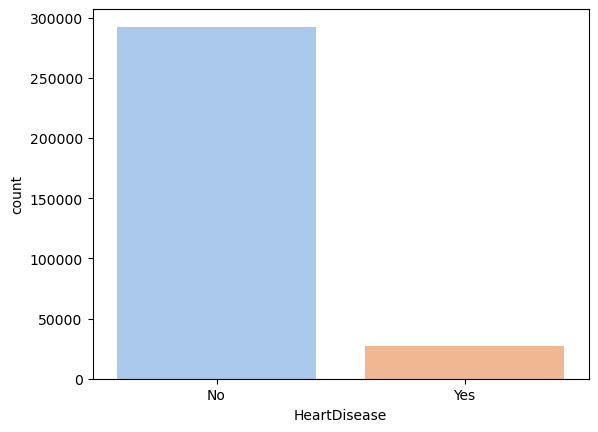

In [12]:
#the distribution of the target variable
sns.countplot(x='HeartDisease',data=df,palette='pastel')

Since the data is unbalanced (292422 people don't have heart disease and 27373 people have heart disease), these bar graphs do not help us to understand the data well (The same is true for all features). Investigating among the people having heart disease could be a better strategy to understand the effect of a certain feature on this topic so the following graphs were prepared considering this fact.

In [13]:
df.HeartDisease.value_counts()
# The Percentile of people who have Heart Disease
No_Value = df.HeartDisease.value_counts()[0]
Yes_Value = df.HeartDisease.value_counts()[1]
print("The number of People that have Heart Disease is ", Yes_Value , " and have Percentage Value {}%".format(((Yes_Value/len(df))*100).round(2)))
print("The number of People that do not have Heart Disease is ", No_Value , " and have Percentage Value {}%".format(((No_Value/len(df))*100).round(2)))

The number of People that have Heart Disease is  27373  and have Percentage Value 8.56%
The number of People that do not have Heart Disease is  292422  and have Percentage Value 91.44%


# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">4. | Visualization 👋</div>

Plot numeric column

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:ylabel='Density'>

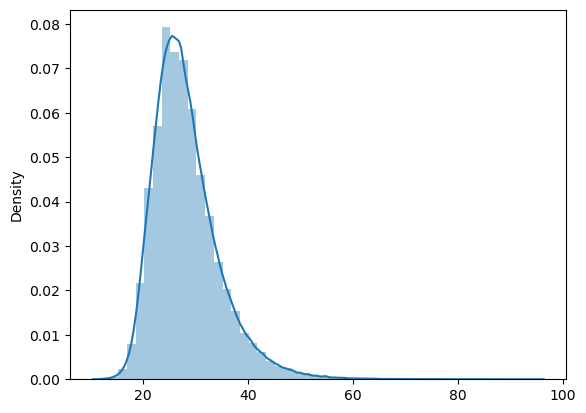

In [14]:
sns.distplot(x=df["BMI"],hist=True)

<AxesSubplot:xlabel='HeartDisease', ylabel='BMI'>

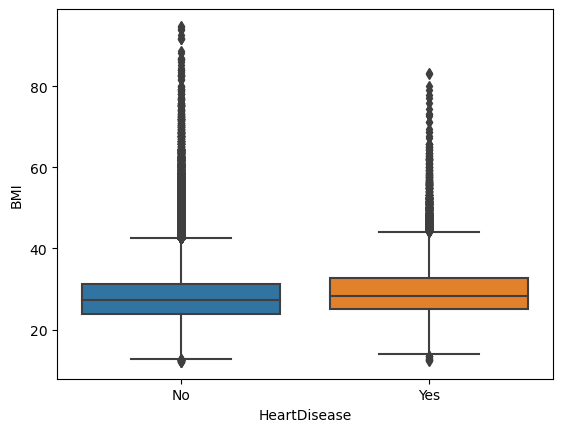

In [15]:
sns.boxplot(y=df["BMI"], x=df["HeartDisease"])

In [16]:
def detect_outlier(col):
    IQR = df[col].quantile(.75) - df[col].quantile(.25)
    max_whiskers = df[col].quantile(.75) + (IQR*1.5)
    min_whiskers = df[col].quantile(.25) - (IQR*1.5)
    return df[(df[col]<max_whiskers) & (df[col]>min_whiskers)]

In [17]:
df = detect_outlier('BMI')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:ylabel='Density'>

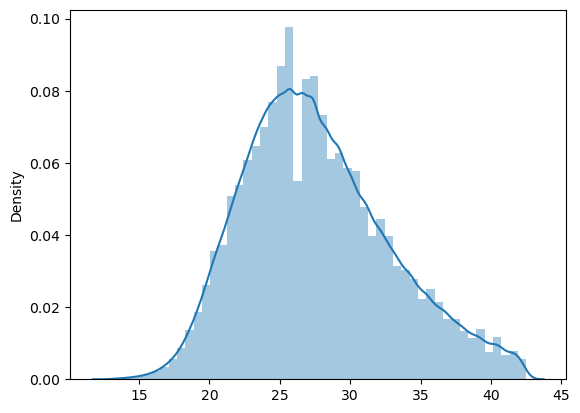

In [18]:
sns.distplot(x=df["BMI"],hist=True)

<AxesSubplot:xlabel='HeartDisease', ylabel='BMI'>

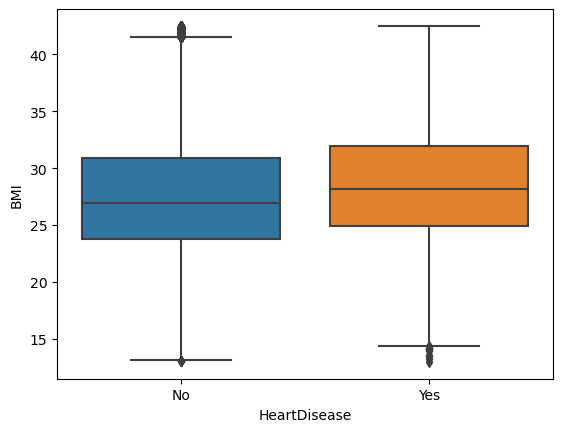

In [19]:
sns.boxplot(y=df["BMI"], x=df["HeartDisease"])

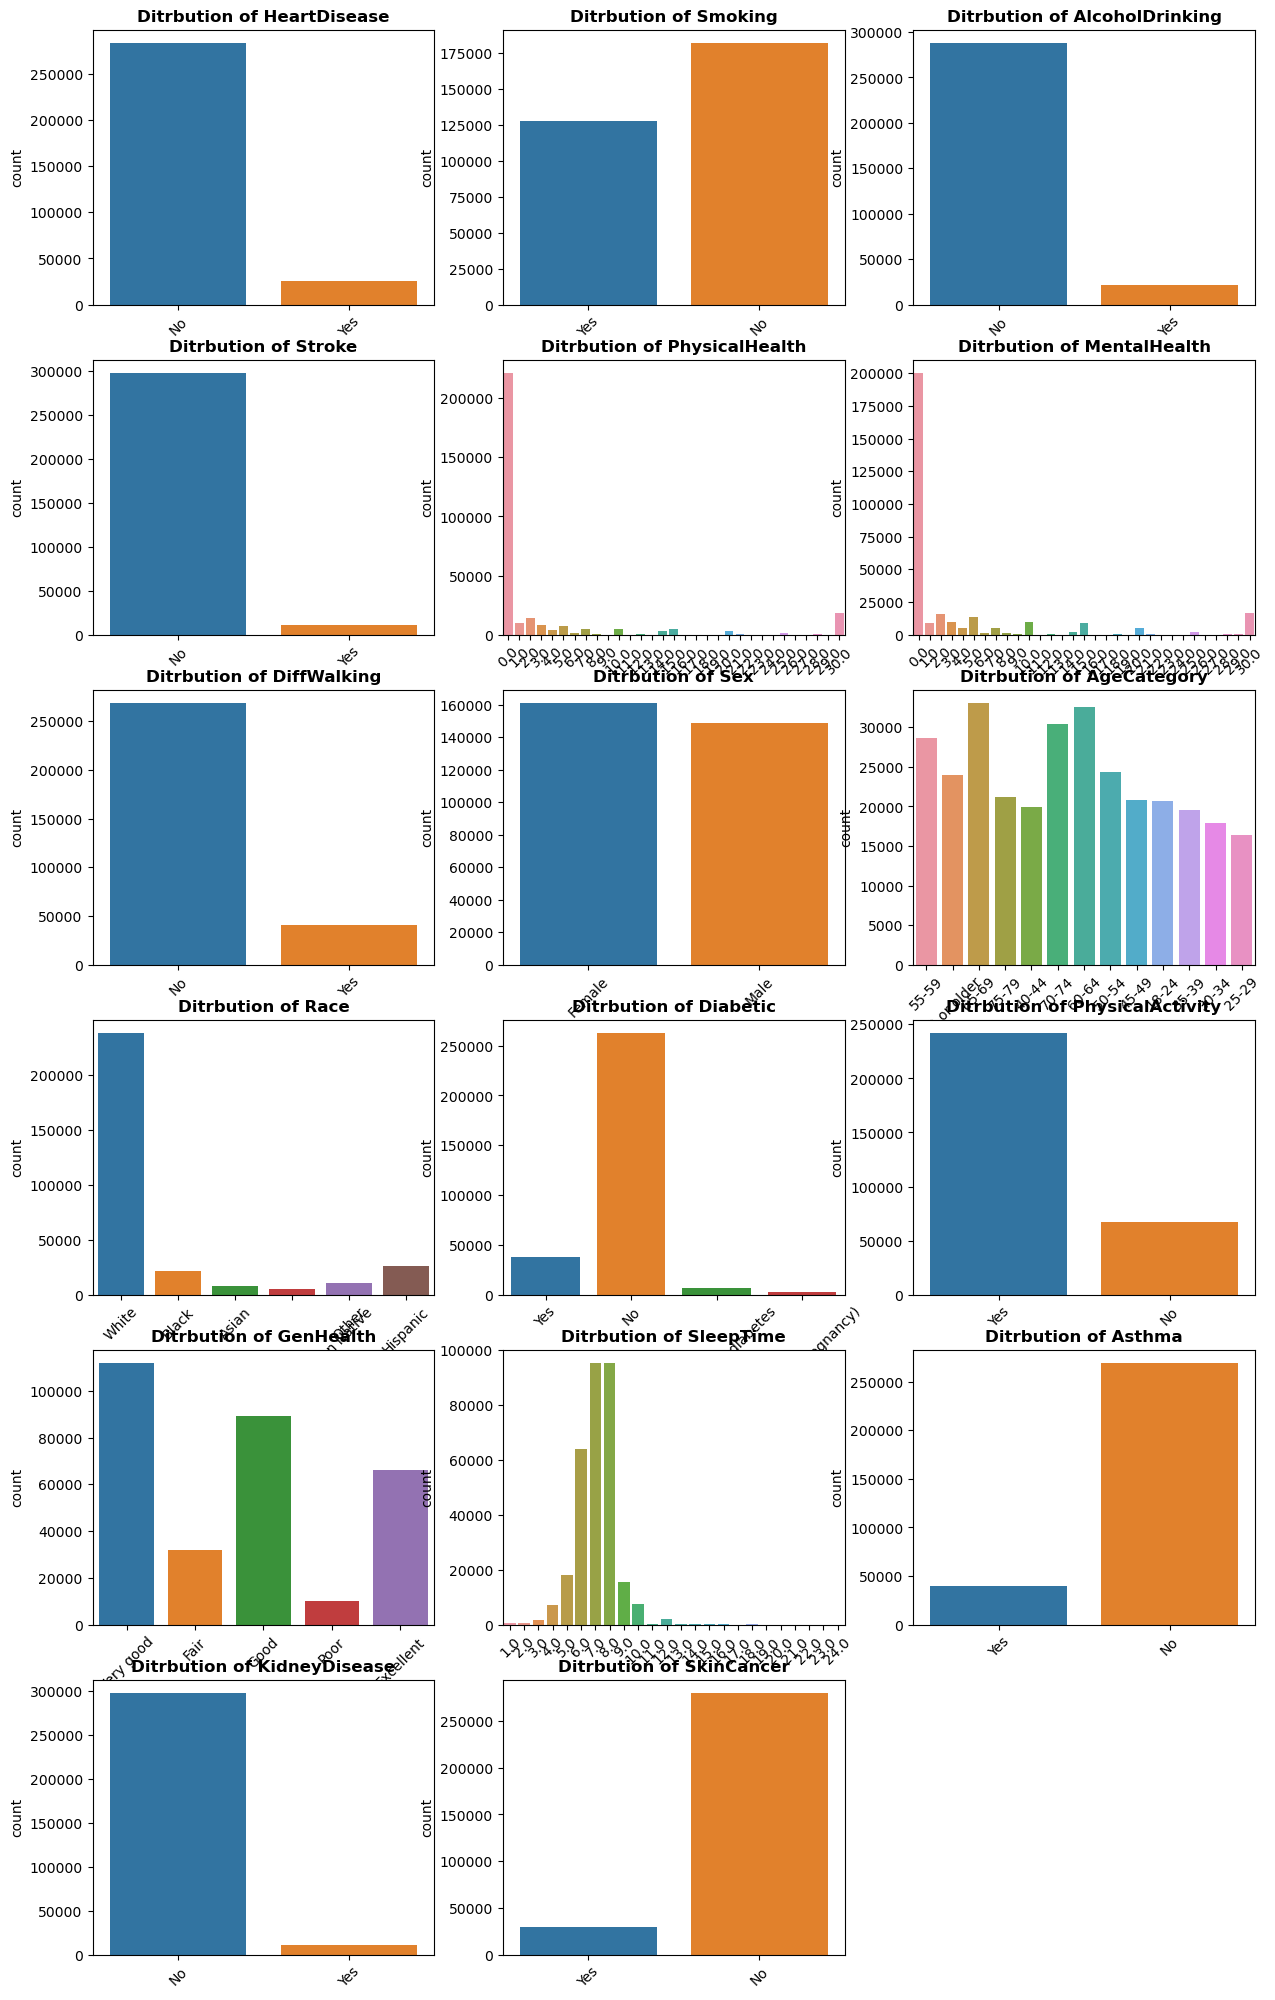

In [20]:
i=1
plt.figure(figsize=(15,25))
for col in df.select_dtypes(include='object').columns:
    plt.subplot(6,3,i)
    plt.xticks(rotation=45)
    sns.countplot(x=col,data=df)
    plt.title(f"Ditrbution of {col}",weight='bold')
    plt.xlabel('')
    i+=1

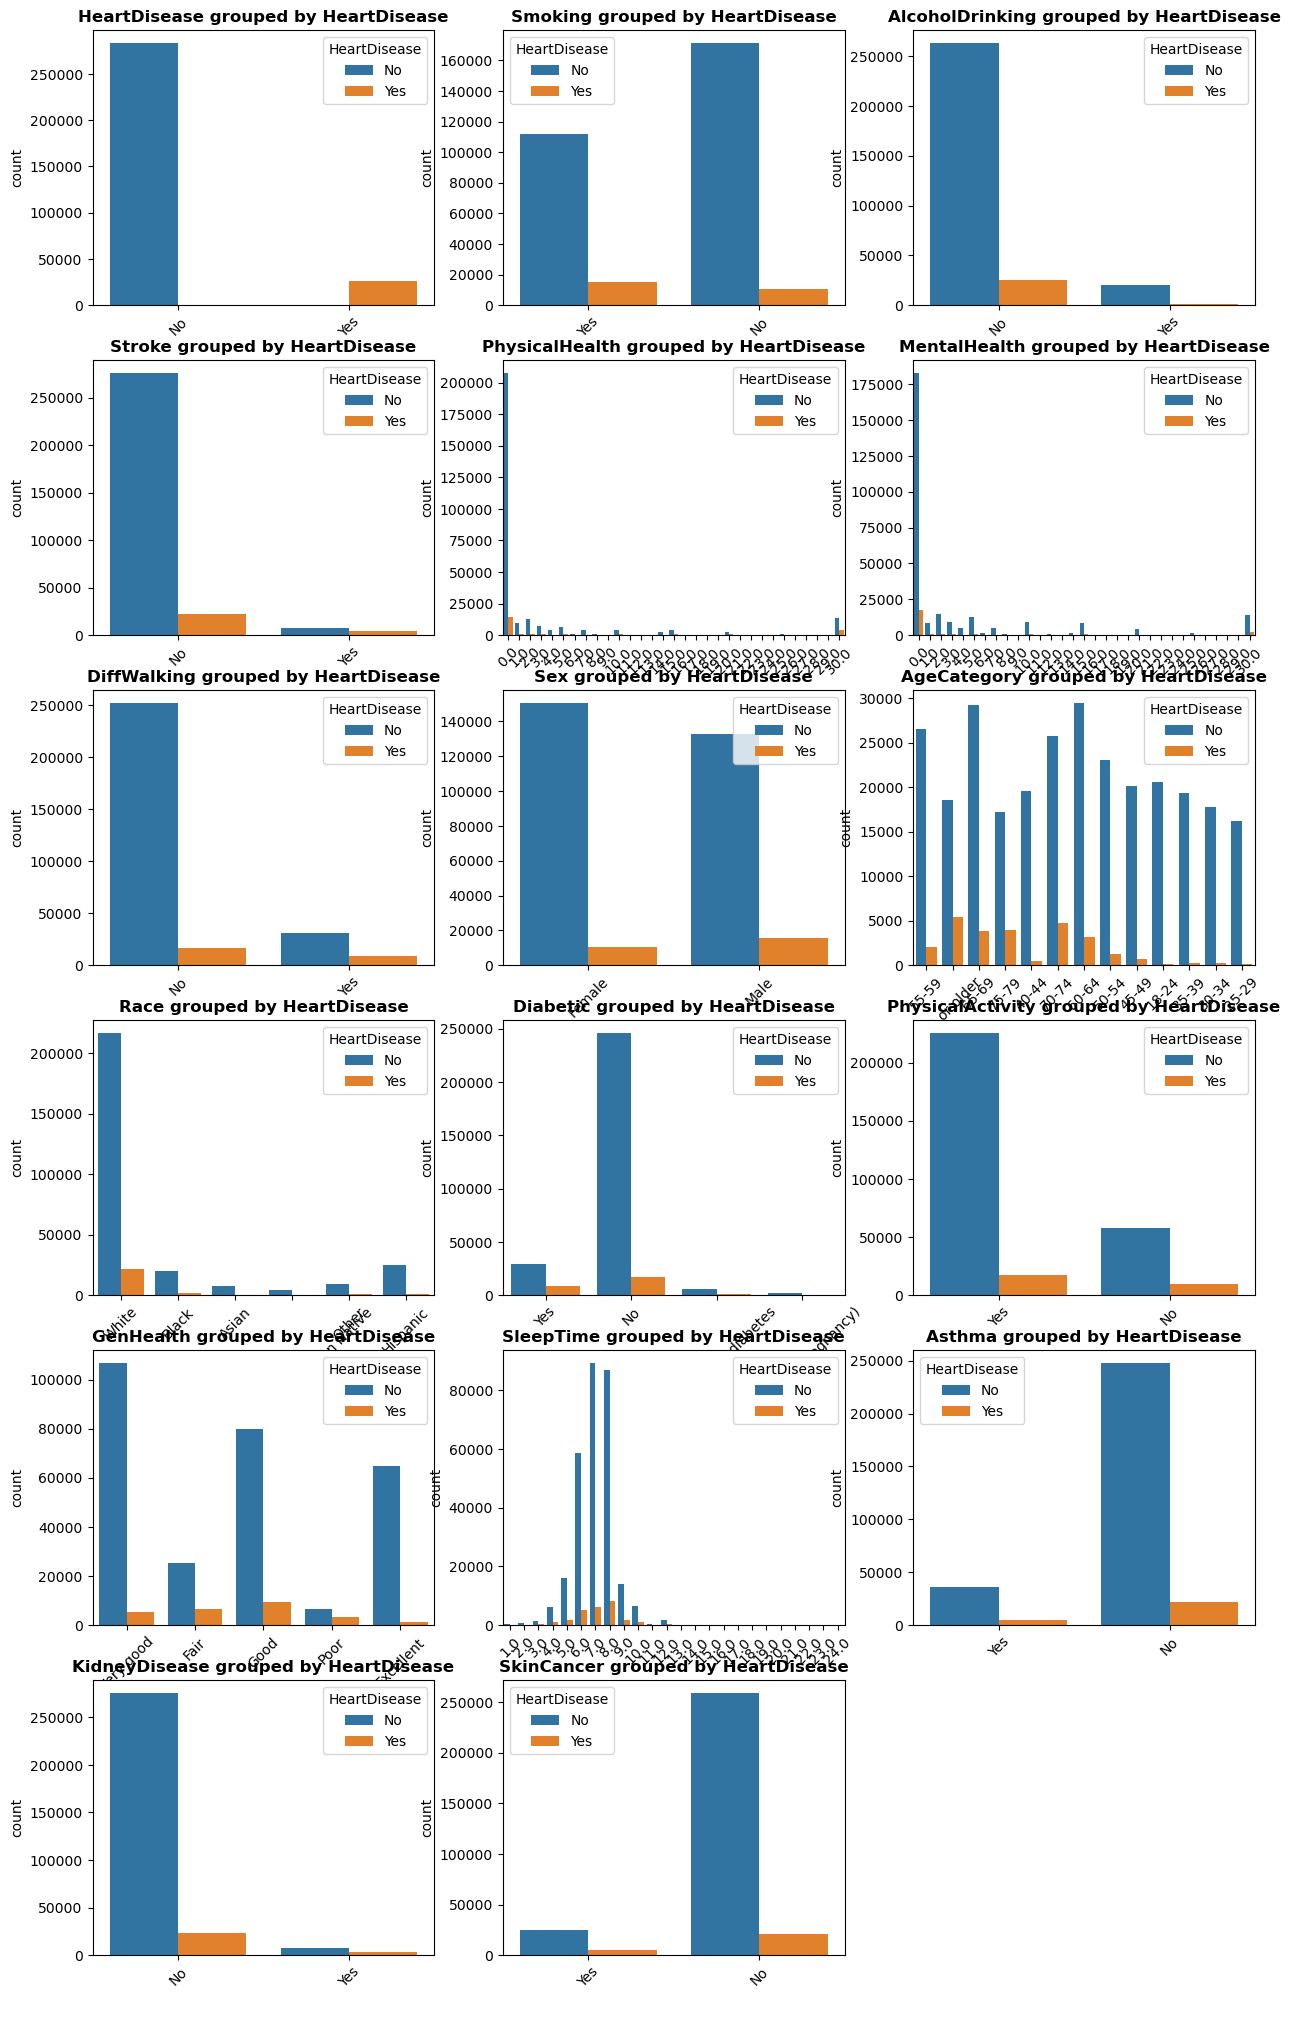

In [21]:
i=1
plt.figure(figsize=(15,25))
for col in df.select_dtypes(include='object').columns:
    plt.subplot(6,3,i)
    plt.xticks(rotation=45)
    sns.countplot(x=col,data=df,hue='HeartDisease')
    plt.title(f"{col} grouped by HeartDisease",fontweight='bold')
    plt.xlabel(' ')
    i+=1



we can see from above charts:
1.   number of people they smoking and have heart disease is more than they don't
2.   number of people they don't drink alcohol and have heart disease is more than they don't
3.   males have heart disease more than females
4.   people who have difficulty walking can have heart disease more than don't
5.   people who have stroke can have heart disease more than don't
6.  people older than 40 years old can have heart disease more than others
7.   Gen health for most people is very good and all can have heart disease in equal proportions
8.  People who are not physically active can get heart disease more than others










Correlation among features

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">3. | Cleaning Data👋</div>

#### **Remove Duplicated rows** 

* Good practice to **remove duplicated rows** before oversampling. Oversampling is a technique used to balance an imbalanced dataset by increasing the number of samples in the minority class. If the dataset contains duplicated rows, they will be included in the oversampleddataset,leading to a further imbalance.

* Additionally, duplicated rows can also skew the results of your model and affect the validity of your analysis, as each duplicated row will carry the same information and therefore contribute to the same result.

* By **removing** **duplicated** **rows**, you can ensure that your dataset is more representative of the underlying population, and that the results of your analysis are more accurate and reliable.


In [22]:
new_df = df.drop_duplicates() 

In [23]:
new_df.shape 

(291328, 18)

**Solve Imbalance Problem In Heart Disease Column using Random Over Sampler technique** 

In [24]:
# prepare variables to Solve Imbalance Problem In Heart Disease Column using Random Over Sampler techinque
features = new_df.drop(columns =['HeartDisease'], axis = 1)
target = new_df['HeartDisease']  

In [25]:
oversample=RandomOverSampler(sampling_strategy='minority')
x_resamled, y_resampled = oversample.fit_resample(features, target)

In [26]:
# Convert the arrays to a DataFrame
cols =['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory','Race' , 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'HeartDisease']
data = pd.DataFrame(np.column_stack((x_resamled, y_resampled)), columns=cols)

print(data.shape)

(530500, 18)


In [27]:
# Now Count repated values in HeartDisease Column after Solving Imbalance Problem using Random Over Sampler techinque
data['HeartDisease'].value_counts()

No     265250
Yes    265250
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

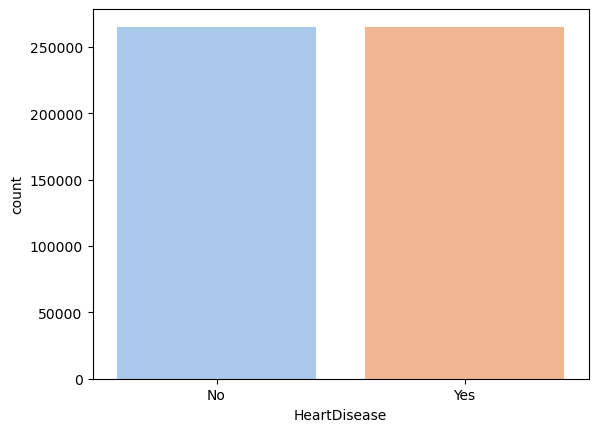

In [28]:
#the distribution of the target variable
sns.countplot(x='HeartDisease',data=data,palette='pastel')

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">4. | Encoding  Categorical columns 👋</div>

* label multiple binary columns with **"yes" and "no"** , we will use a loop and the map function.etc., you can label them like this:

In [29]:
binary_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity' , 'Asthma', 'KidneyDisease', 'SkinCancer']

for column in binary_columns:
    data[column] = data[column].replace({'No':0 , 'Yes':1}) 

 * label the values in a column representing the sex of individuals, you can use the map function. For example, if you have a pandas DataFrame with a column named "sex" and the values are represented as integers (e.g. **0 for female, 1 for male**), you can label it like this:

In [30]:
data['Sex'] = data['Sex'].replace({'Female':0 ,  'Male':1}) 

* label the values in a column representing the general health status of individuals, you can use the map function."genhealth" and the values are represented as integers (e.g. **3 for excellent ,3 for Very Good , 2 for good ,1 for fair, 0 for poor**), you can label it like this:

In [31]:
data['GenHealth'] = data['GenHealth'].map({'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4})    

* label the values in a column representing whether individuals have diabetes or not,"diabetic" and the values are represented as integers (**{'No':0, 'No, borderline diabetes':1, 'Yes (during pregnancy)':2, 'Yes':3}**


In [32]:
data['Diabetic'] = data['Diabetic'].replace({'No':0 , 'No, borderline diabetes':1 ,  'Yes (during pregnancy)':2 , 'Yes':3})                   

* label the values in a column representing the time individuals spend sleeping, "sleep_time" representing the time individuals spend sleeping in hours, you can label it like this:
      * bins = (0, 6, 8, 24)
      * labels = **('less than 6 hours', '6-8 hours', 'more than 8 hours')**

In [33]:
col = 'SleepTime'
data.loc[ (data[col] <= 6) , col ] = 0 
data.loc[ (data[col] > 6) & (data[col] <= 8 ) , col ] = 1
data.loc[ (data[col] > 8 ) & (data[col] <=24), col ] = 2    

In [34]:
cols =['PhysicalHealth' ,'MentalHealth']

for col in cols:
        data.loc[ data[col] <=10 , col ] = 0
        data.loc[ (data[col] > 10) & (data[col] <=20 ) , col ] = 1
        data.loc[ (data[col] > 20) & (data[col] <=25 ) , col ] = 2
        data.loc[ (data[col] > 25) & (data[col] <=30 ) , col ] = 3
        
data[cols[0]].value_counts()  

0    436079
3     59824
1     29408
2      5189
Name: PhysicalHealth, dtype: int64

In [35]:
data.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.6,1,0,0,0,3,0,0,55-59,White,3,1,3,0,1,0,1,0
1,20.34,0,0,1,0,0,0,0,80 or older,White,0,1,3,1,0,0,0,0
2,26.58,1,0,0,1,3,0,1,65-69,White,3,1,1,1,1,0,0,0
3,24.21,0,0,0,0,0,0,0,75-79,White,0,0,2,0,0,0,1,0
4,23.71,0,0,0,3,0,1,0,40-44,White,0,1,3,1,0,0,0,0


#### Get Information for Features and unique values in columns

In [36]:
# Get Information for Features and unique values in columns
for feature in data.columns:
    print(feature)
    print(data[feature].unique()  , len(data[feature].unique()) , 'unique in',feature )
    print('----------------------')

BMI
[16.6 20.34 26.58 ... 41.23 15.57 40.7] 2400 unique in BMI
----------------------
Smoking
[1 0] 2 unique in Smoking
----------------------
AlcoholDrinking
[0 1] 2 unique in AlcoholDrinking
----------------------
Stroke
[0 1] 2 unique in Stroke
----------------------
PhysicalHealth
[0 1 3 2] 4 unique in PhysicalHealth
----------------------
MentalHealth
[3 0 1 2] 4 unique in MentalHealth
----------------------
DiffWalking
[0 1] 2 unique in DiffWalking
----------------------
Sex
[0 1] 2 unique in Sex
----------------------
AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 13 unique in AgeCategory
----------------------
Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 6 unique in Race
----------------------
Diabetic
[3 0 1 2] 4 unique in Diabetic
----------------------
PhysicalActivity
[1 0] 2 unique in PhysicalActivity
----------------------
GenHealth
[3 1 2 0 4] 5 unique in 

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. |  feature extraction 👋</div>

In [37]:
data["BMI"]
print(data["BMI"].unique()  , len(data["BMI"].unique()) , 'unique in',feature ) 

[16.6 20.34 26.58 ... 41.23 15.57 40.7] 2400 unique in HeartDisease


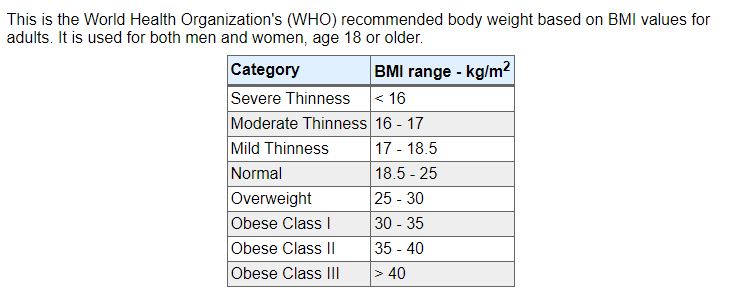

In [38]:
######Function used to transform BMI Values to categories
def transform_bmi(value):
    if value<16:
        return 0
    elif value>=16 and value<17:
        return 1
    elif value>=17 and value<18.5:
        return 2
    elif value>=18.5 and value<25:
        return 3
    elif value>=25 and value<30:
        return 4
    elif value>=30 and value<35:
        return 5
    elif value>=35 and value<40:
        return 6
    elif value>=40 :
        return 7

In [39]:
data["BMI"] = data["BMI"].apply(transform_bmi)
data["BMI"].value_counts(ascending= False)

4    196357
3    148293
5    115847
6     49520
7     11928
2      5888
1      1463
0      1204
Name: BMI, dtype: int64

In [40]:
data['AgeCategory']
print(data['AgeCategory'].unique()  , len(data['AgeCategory'].unique()) , 'unique in',feature )

['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 13 unique in HeartDisease


* AgeCategories 
    - young(30<=AgeCategory <35)
    - mature(35<=AgeCategory <50)
    - senior(50<=AgeCategory <65)
    - old(65<=AgeCategory <80)
    - veryold(80<=AgeCategory )

In [41]:
mapping = {'18-24':0, '25-29': 0, '30-34':0, '35-39':1 , 
           '40-44':1,  '45-49':1, '50-54':2, '55-59':'2', 
           '60-64':'2','65-69':'3', '70-74':'3', '75-79':'3', '80 or older':'4'}


data['AgeCategory'] = data['AgeCategory'].replace(mapping)

In [42]:
data

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,1,1,0,0,0,3,0,0,2,White,3,1,3,0,1,0,1,0
1,3,0,0,1,0,0,0,0,4,White,0,1,3,1,0,0,0,0
2,4,1,0,0,1,3,0,1,3,White,3,1,1,1,1,0,0,0
3,3,0,0,0,0,0,0,0,3,White,0,0,2,0,0,0,1,0
4,3,0,0,0,3,0,1,0,1,White,0,1,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530495,5,1,0,0,0,0,1,1,4,White,0,0,3,1,0,1,1,1
530496,3,1,0,0,0,0,0,1,4,White,0,0,3,0,0,0,1,1
530497,4,0,0,0,0,0,0,0,4,White,1,1,3,0,1,0,0,1
530498,3,0,0,0,0,0,1,0,4,White,0,1,2,1,0,0,0,1


# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. |  feature selection 👋</div>

Correlation among features

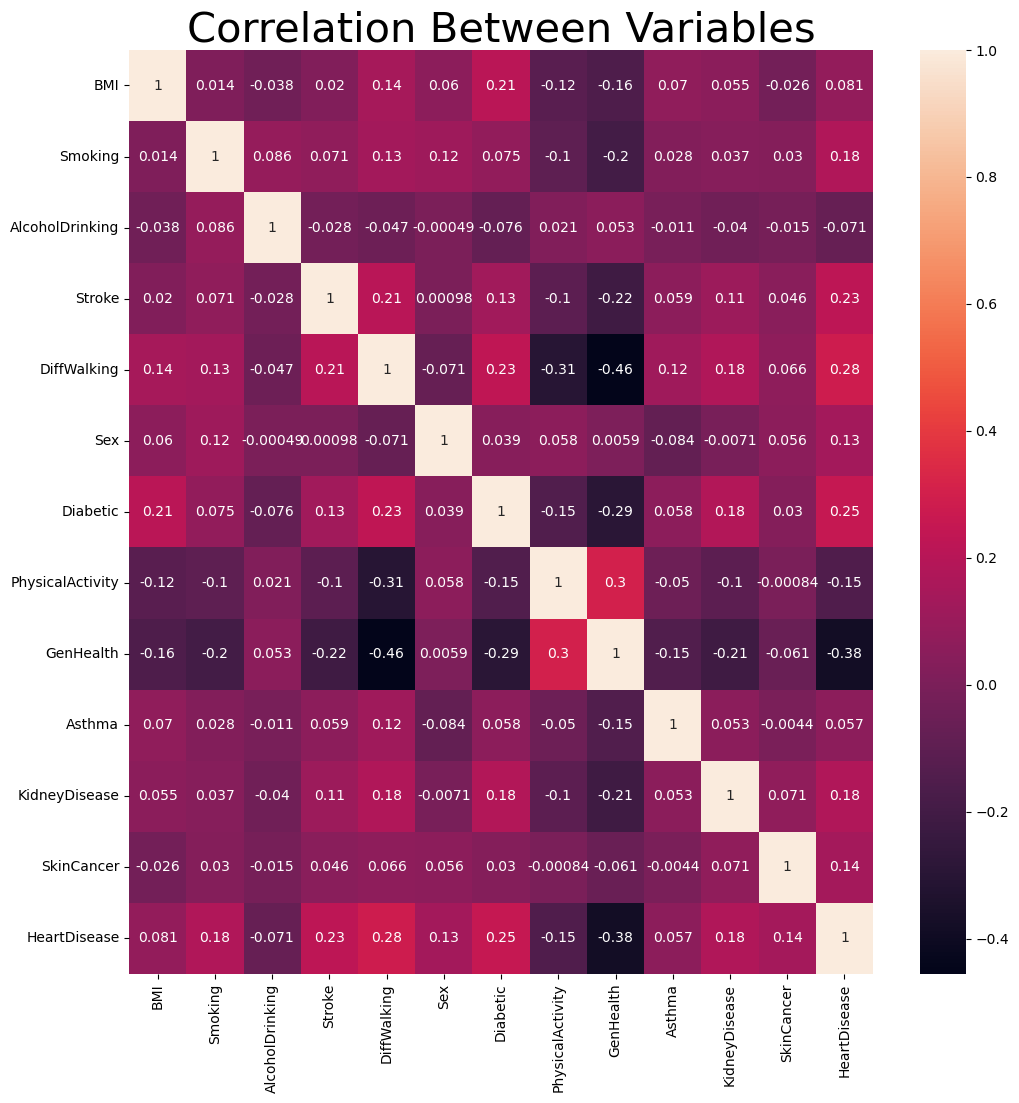

In [43]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot = True)
plt.title('Correlation Between Variables', fontsize = 30)
plt.show()

#### Remove column name 'Race'

In [44]:
data['Race']
print(data['Race'].unique()  , len(data['Race'].unique()) , 'unique in',feature )

['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 6 unique in HeartDisease


In [45]:
data.drop('Race' , axis=1 , inplace=True)

###select feature by class select percentile

In [46]:
y=data['HeartDisease']
X=data.drop(['HeartDisease'], axis=1)
X.shape
from sklearn.feature_selection import SelectPercentile, chi2
FeatureSelection=SelectPercentile(score_func =chi2, percentile=20)
X_new = FeatureSelection.fit_transform(X, y)
print('X_new shape is',X_new.shape)
print('selected features are:',FeatureSelection.get_support())
# print('features names are',FeatureSelection.get_feature_names())

X_new shape is (530500, 3)
selected features are: [False False False False  True False False False  True  True False False
 False False False False]


###select feature by class SelectFromModel

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

y=data['HeartDisease']
X=data.drop(['HeartDisease'], axis=1)

sel = SelectFromModel(RandomForestClassifier(n_estimators = 20)) 
sel.fit(X,y)
selected_features = sel.transform(X)
sel.get_support()

array([ True, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False])